In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('drive/My Drive/БММ/dataset_bmm.csv')

In [5]:
dataset

,prompt,canonical_solution,model_response,target
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,False
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",False
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,False
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,False
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,False
...,...,...,...,...
6657,"<file_sep><fim_prefix>import { describe, expec...","queryKey: ['key'],","queryKey: ['key'],",True
6658,<file_sep><fim_prefix>import moment from'momen...,dateRangeType: DateRangeType;,dateRangeType: DateRangeType;,True
6659,<file_sep><fim_prefix>package dkim\nimport (\n...,"func (p *parser) xalgorithm() (string, string) {",//../rfc/6376:658,False
6660,<file_sep><fim_prefix>package com.tencent.supe...,String line;,String line = br.readLine();,False


In [6]:
dataset[dataset['target'] == True]

,prompt,canonical_solution,model_response,target
6,"<file_sep><fim_prefix>#include ""tachyon/c/zk/p...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",True
9,<file_sep><fim_prefix>// Copyright 2020 The Go...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },True
11,<file_sep><fim_prefix>import type { urlModel }...,\tfield: string;,\tfield: string;,True
16,<file_sep><fim_prefix>import logging\nimport o...,logger.warning(,logger.warning(,True
17,<file_sep><fim_prefix>import pytest\nfrom rest...,"""residual_proba"": RISK_SCENARI...","""residual_proba"": RISK_SCENARI...",True
...,...,...,...,...
6655,<file_sep><fim_prefix>package msgqueue\nimport...,\treturn string(s),\treturn string(s),True
6656,<file_sep><fim_prefix>import logging\nimport o...,for challenge in challenges,for challenge in challenges,True
6657,"<file_sep><fim_prefix>import { describe, expec...","queryKey: ['key'],","queryKey: ['key'],",True
6658,<file_sep><fim_prefix>import moment from'momen...,dateRangeType: DateRangeType;,dateRangeType: DateRangeType;,True


#EDA

In [7]:
dataset.shape

(6662, 4)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

target
False    0.609276
True     0.390724
Name: proportion, dtype: float64


<Axes: xlabel='count', ylabel='target'>

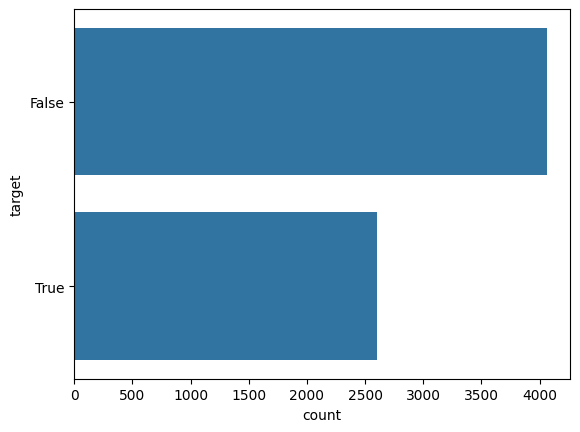

In [9]:
target = dataset['target'].value_counts(normalize=True)
print(target)
sns.countplot(data=dataset, y='target')

<Axes: xlabel='target'>

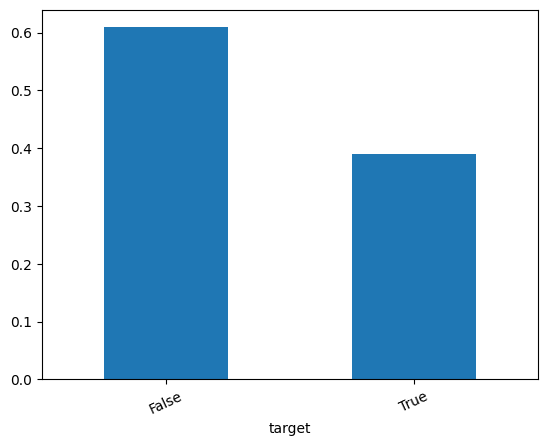

In [10]:
target.plot.bar(rot=25)

In [11]:
dataset['length_prompt'] = list(map(lambda x: len(x), dataset['prompt']))

In [12]:
dataset

,prompt,canonical_solution,model_response,target,length_prompt
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,False,2723
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",False,4054
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,False,4247
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,False,2603
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,False,695
...,...,...,...,...,...
6657,"<file_sep><fim_prefix>import { describe, expec...","queryKey: ['key'],","queryKey: ['key'],",True,1148
6658,<file_sep><fim_prefix>import moment from'momen...,dateRangeType: DateRangeType;,dateRangeType: DateRangeType;,True,14189
6659,<file_sep><fim_prefix>package dkim\nimport (\n...,"func (p *parser) xalgorithm() (string, string) {",//../rfc/6376:658,False,2749
6660,<file_sep><fim_prefix>package com.tencent.supe...,String line;,String line = br.readLine();,False,2566


<Axes: ylabel='length_prompt'>

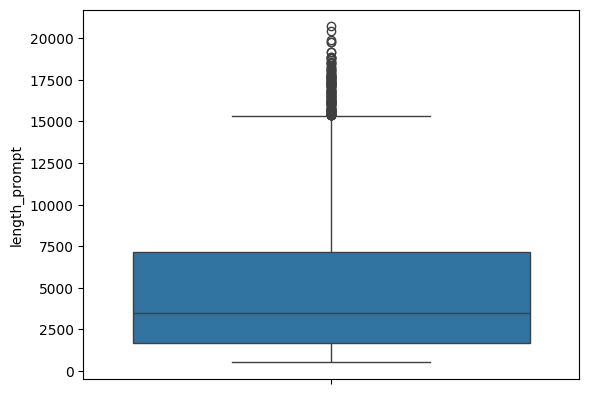

In [13]:
sns.boxplot(dataset['length_prompt'])

In [14]:
def word_count(text):
    return len(text.split())

In [15]:
dataset['word_count'] = dataset['prompt'].apply(word_count)
dataset.head(10)

,prompt,canonical_solution,model_response,target,length_prompt,word_count
0,<file_sep><fim_prefix>// Copyright 2020 The Go...,\t\tswitch x.Interface().(type) {,\t\t// False sorts before true.,False,2723,357
1,<file_sep><fim_prefix>import re\nimport uuid\n...,"st.markdown(""---"")","if st.session_state[""mdl_json""]:",False,4054,282
2,<file_sep><fim_prefix>package tlsrpt\nimport (...,func (p *parser) wsp() {,//../rfc/8460:374,False,4247,694
3,"<file_sep><fim_prefix>import { describe, expec...",expect(() => (rect = new class_test.Rect()...,expect(() => (rect = new class_test.Rectan...,False,2603,206
4,<file_sep><fim_prefix>import type {\n Default...,* Include or exclude stale queries,* Include queries matching this mutation key,False,695,86
5,<file_sep><fim_prefix>import { TreeGraphData }...,dimensions: ISemantic.IDimensionList;,defaultMetricId: number;,False,11084,990
6,"<file_sep><fim_prefix>#include ""tachyon/c/zk/p...","tachyon_halo2_bn254_gwc_verifier* verifier,","tachyon_halo2_bn254_gwc_verifier* verifier,",True,2872,141
7,<file_sep><fim_prefix>package prisma\nimport (...,"\terr = r.queries.CleanupStreamEvents(ctx, r.p...","\t_, err = r.queries.CleanupStreamEvents(ctx, tx)",False,2866,284
8,<file_sep><fim_prefix>// Copyright 2019 The Go...,// on the current extension field.,// on the extension field being iterated over.,False,2533,358
9,<file_sep><fim_prefix>// Copyright 2020 The Go...,\tEntryRanger interface{ Range(VisitEntry) },\tEntryRanger interface{ Range(VisitEntry) },True,1942,265


In [18]:
dataset.describe()

,length_prompt,word_count
count,6662.000000,6662.000000
mean,4916.057190,452.832032
std,3970.078844,396.202860
min,525.000000,35.000000
25%,1707.250000,149.000000
50%,3493.000000,310.000000
75%,7170.250000,640.000000
max,20714.000000,2070.000000
